# Imports

In [164]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [98]:
train=pd.read_csv('Corona_NLP_train.csv',encoding='latin1')

In [99]:
train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


# Text preprocessing for EDA

In [100]:
def preprocess(tweet):
    tweets=tweet.split()
    tweets=[tweet for tweet in tweets if not tweet.startswith("https")]
    tweets = ' '.join(tweets)
    tweets = re.sub('[^a-zA-Z]', ' ', tweets)
    tweets=tweets.lower()
    tweets=tweets.split()
    tweets=[tweet for tweet in tweets if not tweet in stopwords.words('english')]
    tweets = ' '.join(tweets)
    return tweets

In [101]:
train['tweet'] = train.OriginalTweet.apply(lambda tweet: preprocess(tweet))

In [102]:
train.tweet

0                             menyrbie phil gahan chrisitv
1        advice talk neighbours family exchange phone n...
2        coronavirus australia woolworths give elderly ...
3        food stock one empty please panic enough food ...
4        ready go supermarket covid outbreak paranoid f...
                               ...                        
41152    airline pilots offering stock supermarket shel...
41153    response complaint provided citing covid relat...
41154    know getting tough kameronwilds rationing toil...
41155    wrong smell hand sanitizer starting turn coron...
41156    tartiicat well new used rift going amazon rn a...
Name: tweet, Length: 41157, dtype: object

# Exploratory Data Analysis

In [103]:
train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,menyrbie phil gahan chrisitv
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice talk neighbours family exchange phone n...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths give elderly ...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,food stock one empty please panic enough food ...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,ready go supermarket covid outbreak paranoid f...


In [104]:
#checking if there are any null values
train.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
tweet               0
dtype: int64

In [105]:
#Dropping columns that we will not use
train.drop(['UserName','ScreenName','TweetAt'],axis=1,inplace=True)

In [106]:
train.head()

,Location,OriginalTweet,Sentiment,tweet
0,London,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,menyrbie phil gahan chrisitv
1,UK,advice Talk to your neighbours family to excha...,Positive,advice talk neighbours family exchange phone n...
2,Vagabonds,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths give elderly ...
3,NaN,My food stock is not the only one which is emp...,Positive,food stock one empty please panic enough food ...
4,NaN,"Me, ready to go at supermarket during the #COV...",Extremely Negative,ready go supermarket covid outbreak paranoid f...


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

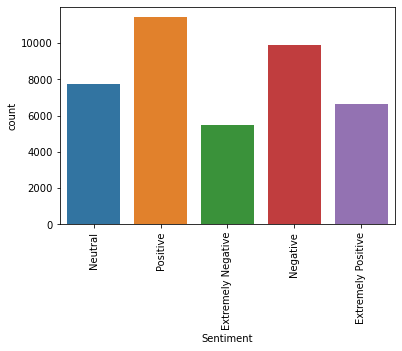

In [107]:
plt.xticks(rotation=90)
sns.countplot(train.Sentiment)

In [108]:
#Let us change Extremely Negative and Positive sentiment by Negative and Positive
train.Sentiment=train.Sentiment.apply(lambda x: "Positive" if x=="Extremely Positive" else x)
train.Sentiment=train.Sentiment.apply(lambda x: "Negative" if x=="Extremely Negative" else x)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

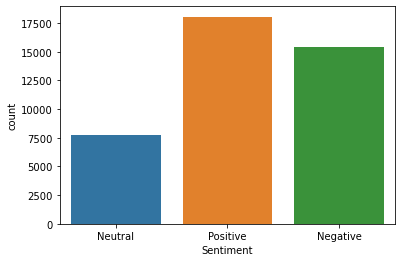

In [109]:
sns.countplot(train.Sentiment)

### Looking at the number of characters

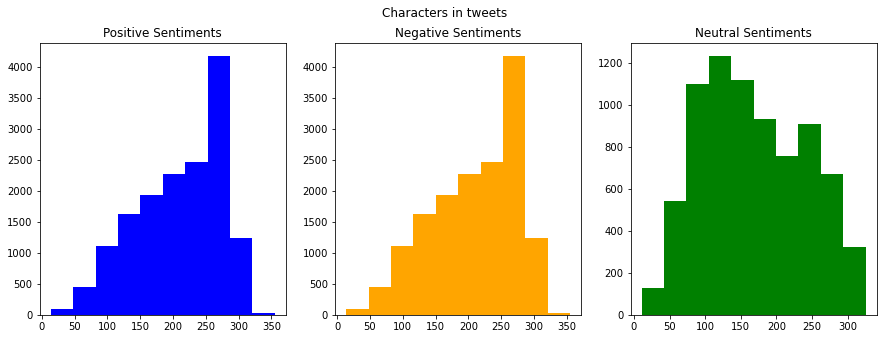

In [110]:
# Creating the figure
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

tweet_len=train[train['Sentiment']=="Negative"]['OriginalTweet'].str.len()
ax1.hist(tweet_len,color='blue')
ax1.set_title('Positive Sentiments')

tweet_len=train[train['Sentiment']=="Negative"]['OriginalTweet'].str.len()
ax2.hist(tweet_len,color='orange')
ax2.set_title('Negative Sentiments')

tweet_len=train[train['Sentiment']=="Neutral"]['OriginalTweet'].str.len()
ax3.hist(tweet_len,color='green')
ax3.set_title('Neutral Sentiments')

fig.suptitle('Characters in tweets')
plt.show()

### Looking at the number of words

In [111]:
tweet_len=train[train['Sentiment']=="Negative"]['OriginalTweet'].str.split()

In [112]:
tweet_len.apply(lambda x: len(x))

4        40
9        42
20       41
24       39
26       28
         ..
41133    36
41147    11
41149    28
41153    23
41156    46
Name: OriginalTweet, Length: 15398, dtype: int64

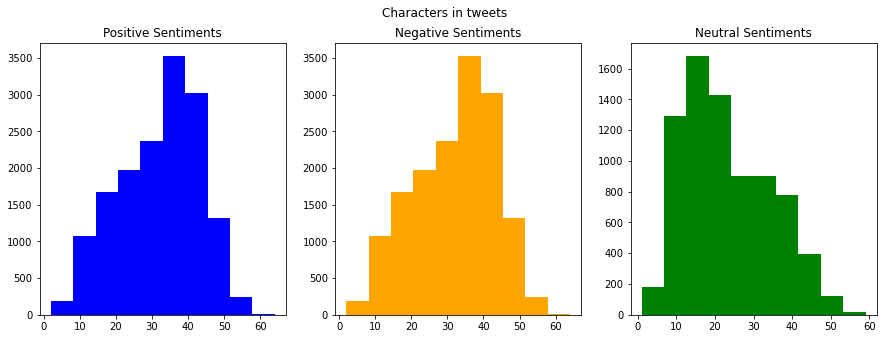

In [113]:
# Creating the figure
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

tweet_len=train[train['Sentiment']=="Negative"]['OriginalTweet'].str.split().apply(lambda x: len(x))
ax1.hist(tweet_len,color='blue')
ax1.set_title('Positive Sentiments')

tweet_len=train[train['Sentiment']=="Negative"]['OriginalTweet'].str.split().apply(lambda x: len(x))
ax2.hist(tweet_len,color='orange')
ax2.set_title('Negative Sentiments')

tweet_len=train[train['Sentiment']=="Neutral"]['OriginalTweet'].str.split().apply(lambda x: len(x))
ax3.hist(tweet_len,color='green')
ax3.set_title('Neutral Sentiments')

fig.suptitle('Characters in tweets')
plt.show()

# Most Common Words

## N_grams

In [114]:
def get_top_n_words(corpus,ngram=1, n=None):
    words_freq={}
    vec = CountVectorizer(ngram_range=(ngram, ngram)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    for word, idx in vec.vocabulary_.items():
        words_freq[word] = sum_words[0, idx]
        
    return sorted(words_freq.items(), key=lambda x: x[1],reverse=True)[:n]

#### Unigrams

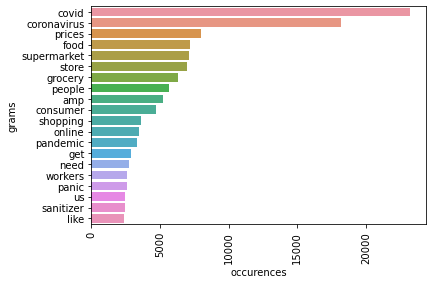

In [115]:
bigrams= get_top_n_words(train.tweet.to_list(),n=20,ngram=1)
bigrams = pd.DataFrame(bigrams, columns =['grams', 'occurences']) 
# Creating the figure
plt.xticks(rotation=90)
sns.barplot(data=bigrams,x=bigrams.occurences,y=bigrams.grams)
plt.show()

#### Bi-grams

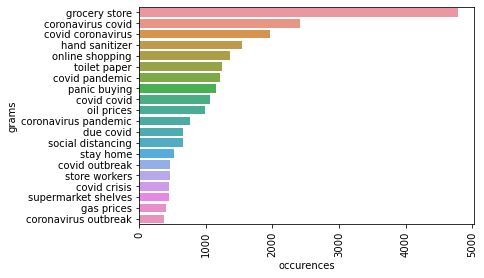

In [116]:
bigrams= get_top_n_words(train.tweet.to_list(),n=20,ngram=2)
bigrams = pd.DataFrame(bigrams, columns =['grams', 'occurences']) 
# Creating the figure
plt.xticks(rotation=90)
sns.barplot(data=bigrams,x=bigrams.occurences,y=bigrams.grams)
plt.show()

#### Tri-grams

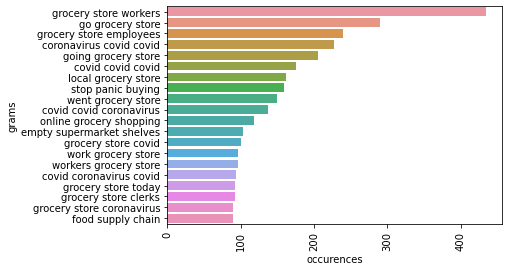

In [117]:
bigrams= get_top_n_words(train.tweet.to_list(),n=20,ngram=3)
bigrams = pd.DataFrame(bigrams, columns =['grams', 'occurences']) 
# Creating the figure
plt.xticks(rotation=90)
sns.barplot(data=bigrams,x=bigrams.occurences,y=bigrams.grams)
plt.show()

# Checking the differents Hashtags

In [122]:
def hashtags(text):
    hash=re.findall(r'@\w+',text)
    return " ".join(line)



In [131]:
train['hash']=train['OriginalTweet'].apply(lambda x:find_hash(x))
best_hashtags=train.hash.value_counts()[:][1:10]

<AxesSubplot:xlabel='myhashtags', ylabel='occurences'>

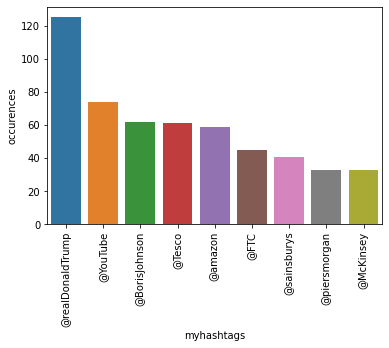

In [141]:
plt.xticks(rotation=90)
hashtags=best_hashtags.to_frame().reset_index().rename(columns={'index':'myhashtags','hash':'occurences'})
sns.barplot(x=hashtags.myhashtags,y=hashtags.occurences)

# Wordcloud

In [154]:
wordcloud = WordCloud(background_color='black',colormap="Blues", 
                        width=500,height=300).generate(" ".join(train['tweet']))

Text(0.5, 1.0, 'Most common words in tweets')

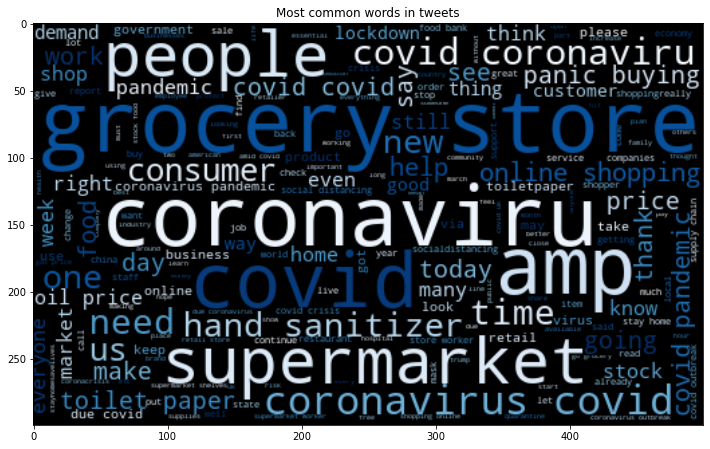

In [160]:
fig, ax1 = plt.subplots(1,1,figsize=[12, 8])
ax1.imshow(wordcloud,interpolation='bilinear')
ax1.set_title('Most common words in tweets')

# Sentiment Polarity

In [170]:
sid=SentimentIntensityAnalyzer()
train['polarity_score']=train.tweet.apply(lambda x: sid.polarity_scores(x)['compound'])

In [171]:
train.head()

,Location,OriginalTweet,Sentiment,tweet,hash,scores,polarity_score
0,London,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,menyrbie phil gahan chrisitv,@MeNyrbie @Phil_Gahan @Chrisitv,0.0000,0.0000
1,UK,advice Talk to your neighbours family to excha...,Positive,advice talk neighbours family exchange phone n...,,0.4588,0.4588
2,Vagabonds,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths give elderly ...,,0.4588,0.4588
3,NaN,My food stock is not the only one which is emp...,Positive,food stock one empty please panic enough food ...,,0.3400,0.3400
4,NaN,"Me, ready to go at supermarket during the #COV...",Negative,ready go supermarket covid outbreak paranoid f...,,-0.5574,-0.5574


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='polarity_score', ylabel='Density'>

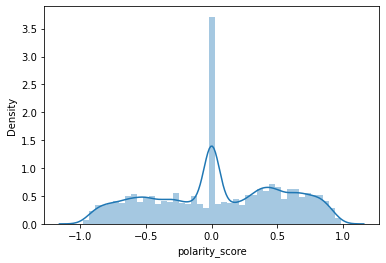

In [198]:
sns.distplot(train.polarity_score)